# Film Feedback Classificator with TensorFlow

Загрузка набора данных IMDB. Загружается только 10000 из 88585 уникальных слов, так как многие из них встречаются только в одном образце и поэтому не несут полезной информации для классификации.

Переменные train_data и test_data — это списки отзывов, где каждый отзыв — это список индексов слов (кодированное представление последовательности слов).
Переменные train_labels и test_labels — это списки нулей и единиц, где нули соответствуют отрицательным отзывам, а единицы — положительным

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=20000)

Декорирование отзыва в текст. Индексы смещены на 3, потому что индексы 0, 1 и 2 зарезервированы для слов padding (отступ), start of sequence (начало последовательности) и unknown (неизвестно).

In [2]:
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what th

Векторизация данных в 10000-мерный вектор и преобразование меток в массивы NumPy. То есть каждый отзыв будет представлен в формате вектора, где все использованные индексы слов будут иметь 1, а неиспользованные 0.

In [3]:
def vectorize_sequences(sequences, dimension=20000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Построение модели.

In [4]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Компиляция модели.

In [5]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Отделение валидационной выборки данных от обучающих данных.

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Обучение модели.

In [7]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.6894 - loss: 0.6005 - val_accuracy: 0.8410 - val_loss: 0.4173
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8933 - loss: 0.3407 - val_accuracy: 0.8856 - val_loss: 0.3116
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9276 - loss: 0.2403 - val_accuracy: 0.8617 - val_loss: 0.3321
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9425 - loss: 0.1884 - val_accuracy: 0.8899 - val_loss: 0.2706


Визуализация потерь во время обучения.

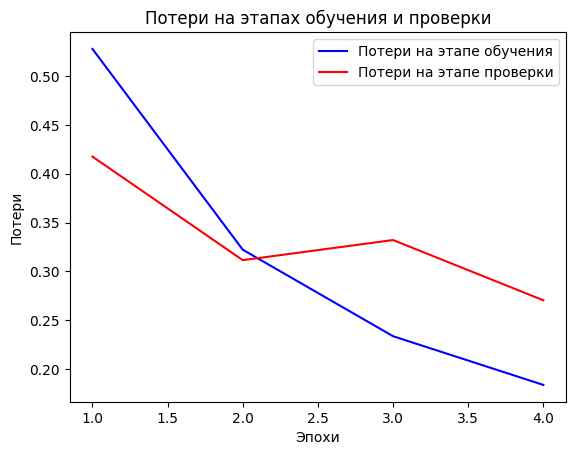

In [8]:
loss_values = history.history.get('loss')
val_loss_values = history.history.get('val_loss')
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label='Потери на этапе обучения')
plt.plot(epochs, val_loss_values, "r", label='Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Визуализация точности во время обучения.

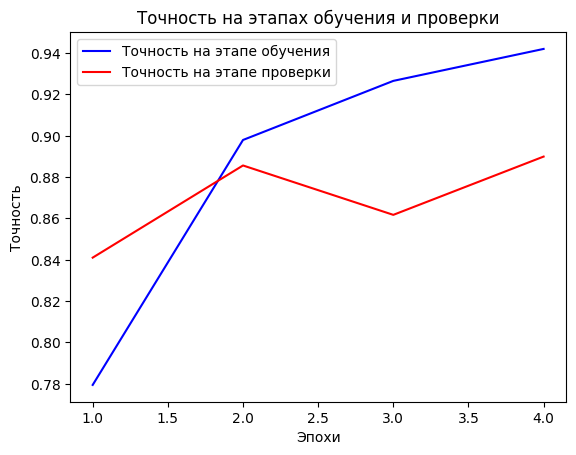

In [9]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Точность на этапе обучения')
plt.plot(epochs, val_acc, 'r', label='Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Проверка модели.

In [14]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.26700416],
       [0.99801016],
       [0.9003176 ],
       ...,
       [0.08086079],
       [0.14919612],
       [0.64331007]], dtype=float32)